# Office 365 Trial Conversion  
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
#### Dated: 26-Jan-2016
#### Data: Random trialers who started trials between 01-Apr-2015 and 31-Jul-2015

In [2]:
#Import Code
from sklearn import tree
from subprocess import call
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 
import IPython.core.display as di
from prettytable import PrettyTable
from DecisionTreeHelpers.cdt import getTreePicture
from DecisionTreeHelpers.cdt import getLegibleCode
from DecisionTreeHelpers.cdt import printImportance
from DataScienceUtil.helpers import getRand
from DataScienceUtil.helpers import labelSuccess
from DataScienceUtil.helpers import totalAndConv
from DataScienceUtil.helpers import plotStackedBar
from DataScienceUtil.helpers import getCrossTabSums
from DataScienceUtil.helpers import printCrossTab
from DataScienceUtil.helpers import plotStackedBarWithTitle
from DataScienceUtil.helpers import printGroupByTab

from sklearn.ensemble import RandomForestClassifier


pd.options.mode.chained_assignment = None



In [3]:
%matplotlib inline  

#dat = pd.read_csv('c:\\Work\\Trial\\ConversionModel\\iter5\\ModellingDataset_v4.csv', sep=',')
dat = pd.read_csv('OUT_ModellingDataset_i11.txt', sep='\t')
print 'dataset ',len(dat.index)
#dat.head()
#'''
#print list(dat.columns.values)
#['TenantId', 'SubscriptionId', 'ConvertedFlag', 'SameSubConvert', 'DiffSubConvert', 
#    'TenantCountryCode', 'TrialStartDate', 'TrialEndDate', 'TrialDuration', 'TrialChannelType', 
#    'TrialIncludedQuantity', 'TrialPartnerId', 'TrialOfferId', 'TrialOfferName', 'TrialProductFamily', 
#    'TrialSKUId', 'TrialSKUName', 'TrialToPaidSubscriptionConversionType', 'IsSubscriptionTransitionConversion', 
#    'TrialToPaidConversionDate', 'PaidSubscriptionId', 'PaidStartDate', 'PaidEndDate', 'PaidOfferId', 
#    'PaidOfferName', 'PaidProductFamily', 'PaidSKUId', 'PaidSKUName', 'PaidPartnerId', 'PaidChannelType', 
#    'PaidIncludedQuantity', 'TrialToPaidSKUConversionType', 'keyOffer', 'randInt', 'TenantCreatedDate', 
#    'TCD_Sub_TSD', 'NewTenant', 'DomainCreatedDate', 'IsVerfiedDomain', 
#    'EXODays_wk1', 'SPODays_wk1', 'LYODays_wk1', 'YammerDays_wk1', 'DeployedUsers_wk1', 'DeployedMachines_wk1', 
#    'Pc_Deployed_Users_wk1', 'Mac_Deployed_Users_wk1', 'iPad_Deployed_Users_wk1', 'iPhone_Deployed_Users_wk1', 
#    'AndroidPhone_Deployed_Users_wk1', 'AndroidTablet_Deployed_Users_wk1', 'Pc_Deployed_Machines_wk1', 
#    'Mac_Deployed_Machines_wk1', 'iPad_Deployed_Machines_wk1', 'iPhone_Deployed_Machines_wk1', 
#    'AndroidPhone_Deployed_Machines_wk1', 'AndroidTablet_Deployed_Machines_wk1']
#'''
#print 'Conversion Rate', dat['ConvertedFlag'].sum() *100.0/ len(dat.index)

dataset  420864


In [4]:

#total = len(dat.index)
#convRate = dat['ConvertedFlag'].sum()*1.0/total
total, convRate = totalAndConv(dat)
print 'TOTAL Tenants = ', "{:,}".format(total), '; Conversion Rate ', "{:.2%}".format(convRate)
printCrossTab(dat,'ConvertedFlag','ConvertedFlag'),'\n'

outputStr = "{:,}".format( len((dat.loc[dat['NewTenant'] ==1]).index) )
total, convRate = totalAndConv(dat.loc[dat['NewTenant'] ==1])
print 'TOTAL New Tenants = ', "{:,}".format(total), '; Conversion Rate ', "{:.2%}".format(convRate)
printCrossTab(dat,'ConvertedFlag','NewTenant'),'\n\n'

#print dat.groupby('TrialOfferName').TenantId.nunique()


TOTAL Tenants =  420,864 ; Conversion Rate  19.08%
		ConvertedFlag
+---------------+---------+--------+
| ConvertedFlag |   False |   True |
+---------------+---------+--------+
| False         | 340,565 |      0 |
| True          |       0 | 80,299 |
+---------------+---------+--------+


TOTAL New Tenants =  394,841 ; Conversion Rate  17.53%
		ConvertedFlag
+-----------+---------+--------+
| NewTenant |   False |   True |
+-----------+---------+--------+
| False     |  14,922 | 11,101 |
| True      | 325,643 | 69,198 |
+-----------+---------+--------+




(None, '\n\n')

In [1]:

TrialOffers = ['OFFICE 365 BUSINESS TRIAL', 'OFFICE 365 BUSINESS PREMIUM TRIAL','OFFICE 365 ENTERPRISE E3 TRIAL']
#'OFFICE 365 PROPLUS TRIAL'
newTenants = dat.loc[dat['NewTenant'] == 1]
#printGroupByTab(newTenants, 'TrialOfferName')
newTenants_KeyTrials  = newTenants.loc[newTenants['TrialOfferName'].isin(TrialOffers)]

print 'Considering only ', TrialOffers[1], ',' , TrialOffers[0], ',' , TrialOffers[2]
print '...and, Tenants that were created at most 14 days prior to trial','\n','\n' 

print 'Tenants created at most 14 days prior to trial and only Key Offer NAMES'
print '=======================================================================','\n'

total, convRate = totalAndConv(newTenants_KeyTrials)
print 'TOTAL Tenants = ', "{:,}".format(total), '; Conversion Rate ', "{:.2%}".format(convRate)
#print newTenants_KeyTrials.groupby('TrialOfferName').TenantId.nunique(),'\n'

printGroupByTab(newTenants_KeyTrials, 'TrialOfferName')

newTenants_keyOfferId = newTenants.loc[newTenants['keyOffer'] == 1]

print 'Tenants created at most 14 days prior to trial and only Key Offer Ids'
print '=======================================================================','\n'
total, convRate = totalAndConv(newTenants_keyOfferId)
print 'TOTAL Tenants = ', "{:,}".format(total), '; Conversion Rate ', "{:.2%}".format(convRate)
#print newTenants_keyOfferId.groupby('TrialOfferName').TenantId.nunique(), '\n'

printGroupByTab(newTenants_keyOfferId, 'TrialOfferName')
#df.loc[]

print 'SKUs '

df = newTenants_KeyTrials

def getTrialDuration(row):
    trialToPaidConv = pd.to_datetime(row['TrialToPaidConversionDate'])
    trialStartDate = pd.to_datetime(row['TrialStartDate'])
    trialEndDate = pd.to_datetime(row['TrialEndDate'])
    if row['ConvertedFlag'] == 1:
        return (trialToPaidConv - trialStartDate).days
    else:
        #return min ((trialEndDate - trialStartDate).days, 35)
        return (trialEndDate - trialStartDate).days

def getValidDomainAdd(row):
    trialToPaidConv = pd.to_datetime(row['TrialToPaidConversionDate'])
    trialStartDate = pd.to_datetime(row['TrialStartDate'])
    trialEndDate = pd.to_datetime(row['TrialEndDate'])
    domainDate = pd.to_datetime(row['DomainCreatedDate'])
       
    if row['IsVerfiedDomain'] == True and domainDate >= trialStartDate:
        if row['ConvertedFlag'] == 1:
            if domainDate <= trialToPaidConv:
                return 1
            else: 
                return 0
        elif row['ConvertedFlag'] == 0:
            if domainDate <= trialEndDate:
                return 1
            else:
                return 0
    else:
        return 0
    
#dfx.drop('TrialDur', axis=1, inplace=True)

newTenants_KeyTrials['TrialDur'] = newTenants_KeyTrials.apply (lambda row: getTrialDuration(row),axis=1)
newTenants_KeyTrials['ValidDomainAdd'] = newTenants_KeyTrials.apply (lambda row: getValidDomainAdd(row),axis=1)
#plotConversionRate(dfx, 'TrialDur')


customers = newTenants_KeyTrials[['TenantId', 'TrialDur', 'ConvertedFlag']]

#Group By and count
customer_group = customers.groupby(['TrialDur', 'ConvertedFlag'])
tc = customer_group.TenantId.nunique()
tcUnstack = tc.unstack()
tcUnstack = tcUnstack.fillna(value = 0)
convRatio = []
rowSum = []

#print tcUnstack.columns.values
rowSum = tcUnstack[0] +  tcUnstack[1]
convRatio = tcUnstack[1]/ (rowSum)
start = 5
end = 105
#print tcUnstack.axes[0][start:end]
#print rowSum[start:end], tcUnstack[1][start:end]
plt.bar(tcUnstack.axes[0][start:end], tcUnstack[1][start:end])
#plt.plot(tcUnstack.axes[0][start:end], tcUnstack[0][start:end])
#print tcUnstack[1][start:end]

NameError: name 'dat' is not defined

<Container object of 105 artists>

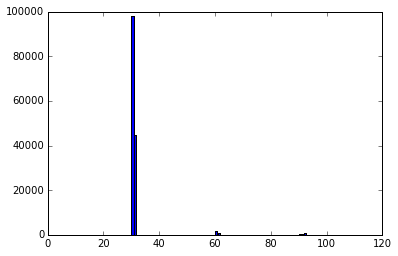

In [6]:
start = 5
end = 110
plt.bar(tcUnstack.axes[0][start:end], tcUnstack[0][start:end])

In [7]:
#Remove Tenants who converted on the first week

#df = newTenants_KeyTrials
newTenants_KeyTrials_PostWk1Conv = newTenants_KeyTrials.loc[df['TrialDur'] > 6]
df = newTenants_KeyTrials_PostWk1Conv
total, convRate = totalAndConv(df)
print 'TOTAL Tenants = ', "{:,}".format(total), '; Conversion Rate ', "{:.2%}".format(convRate)
#print df.groupby('TrialOfferName').TenantId.nunique(),'\n'

printGroupByTab(newTenants_KeyTrials, 'TrialOfferName')

print 'Tenants created at most 14 days prior to trial and only Key Offer NAMES'
print 'and those that converted after the first week'
print '=======================================================================','\n'

total, convRate = totalAndConv(newTenants_KeyTrials_PostWk1Conv)
print 'TOTAL Tenants = ', "{:,}".format(total), '; Conversion Rate ', "{:.2%}".format(convRate)
#print newTenants_KeyTrials_PostWk1Conv.groupby('TrialOfferName').TenantId.nunique(),'\n'
printGroupByTab(newTenants_KeyTrials_PostWk1Conv, 'TrialOfferName')



TOTAL Tenants =  191,988 ; Conversion Rate  19.42%
+-----------------------------------+-------------+
| TrialOfferName                    | TenantCount |
+-----------------------------------+-------------+
| OFFICE 365 BUSINESS PREMIUM TRIAL |      76,677 |
| OFFICE 365 BUSINESS TRIAL         |      56,124 |
| OFFICE 365 ENTERPRISE E3 TRIAL    |      67,764 |
+-----------------------------------+-------------+
Tenants created at most 14 days prior to trial and only Key Offer NAMES
and those that converted after the first week

TOTAL Tenants =  191,988 ; Conversion Rate  19.42%
+-----------------------------------+-------------+
| TrialOfferName                    | TenantCount |
+-----------------------------------+-------------+
| OFFICE 365 BUSINESS PREMIUM TRIAL |      72,547 |
| OFFICE 365 BUSINESS TRIAL         |      53,364 |
| OFFICE 365 ENTERPRISE E3 TRIAL    |      64,892 |
+-----------------------------------+-------------+


		   ConvertedFlag
+----------------+---------+--------+---------+--------+
| ValidDomainAdd |   False |   True |   Total |   Rate |
+----------------+---------+--------+---------+--------+
| 0              | 147,855 | 15,014 | 162,869 |  9.22% |
| 1              |   2,865 | 20,200 |  23,065 | 87.58% |
+----------------+---------+--------+---------+--------+


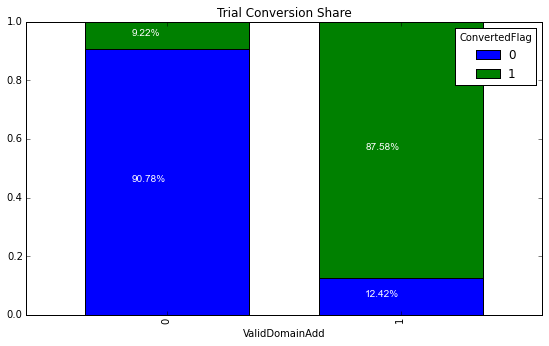

In [8]:

#plotConversionRate(newTenants_KeyTrials_PostWk1Conv, 'ValidDomainAdd')
xVar = 'ValidDomainAdd'
plotStackedBar(newTenants_KeyTrials_PostWk1Conv, xVar, 'ConvertedFlag')

		   ConvertedFlag
+-----------------------------------+--------+--------+--------+--------+
| TrialOfferName                    |  False |   True |  Total |   Rate |
+-----------------------------------+--------+--------+--------+--------+
| OFFICE 365 BUSINESS PREMIUM TRIAL | 53,517 | 19,030 | 72,547 | 26.23% |
| OFFICE 365 BUSINESS TRIAL         | 43,983 |  9,381 | 53,364 | 17.58% |
| OFFICE 365 ENTERPRISE E3 TRIAL    | 56,745 |  8,147 | 64,892 | 12.55% |
+-----------------------------------+--------+--------+--------+--------+


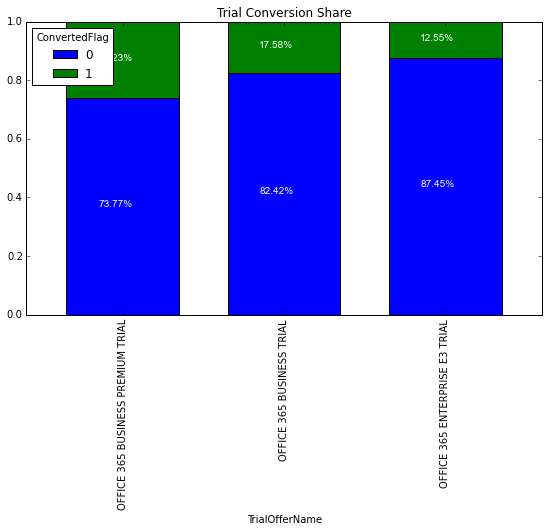

In [9]:
dfx = newTenants_KeyTrials_PostWk1Conv
#plotConversionRate(dfx, 'TrialOfferName')

xVar = 'TrialOfferName'
plotStackedBar(newTenants_KeyTrials_PostWk1Conv, xVar, 'ConvertedFlag')

In [9]:
def labelMonth(row, dateTimeCol):
    return pd.to_datetime(row[dateTimeCol]).month

newTenants_KeyTrials_PostWk1Conv['TrialStartMonth'] = newTenants_KeyTrials_PostWk1Conv.apply (lambda row: labelMonth(row, 'TrialStartDate'),axis=1)

dfx = newTenants_KeyTrials_PostWk1Conv

#plotConversionRate(dfx, 'TrialStartMonth')
xVar = 'TrialStartMonth'
plotStackedBar(newTenants_KeyTrials_PostWk1Conv, xVar, 'ConvertedFlag')

KeyError: 0L

		   ConvertedFlag
+------------------+---------+--------+---------+--------+
| TrialChannelType |   False |   True |   Total |   Rate |
+------------------+---------+--------+---------+--------+
| DIRECT           | 148,852 | 34,235 | 183,087 | 18.70% |
| SYNDICATION      |   1,780 |    674 |   2,454 | 27.47% |
+------------------+---------+--------+---------+--------+


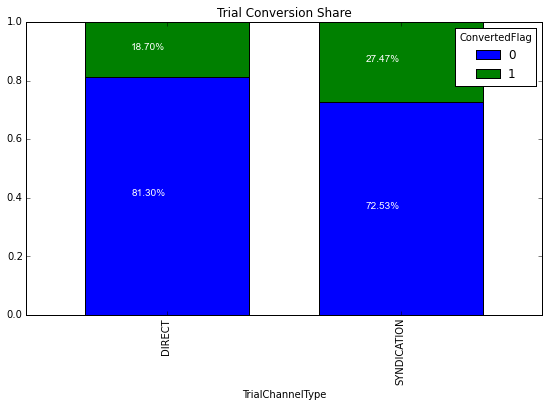

In [10]:
dfx = newTenants_KeyTrials_PostWk1Conv
#plotConversionRate(dfx, 'TrialChannelType')

xVar = 'TrialChannelType'
plotStackedBar(newTenants_KeyTrials_PostWk1Conv, xVar, 'ConvertedFlag')

#### Trial Conversion based on no. of days of EXO, SPO, and LYOUsage

		   ConvertedFlag
+-------------+---------+--------+---------+--------+
| EXODays_wk1 |   False |   True |   Total |   Rate |
+-------------+---------+--------+---------+--------+
| 0           | 134,123 | 24,145 | 158,268 | 15.26% |
| 1           |  10,115 |  3,358 |  13,473 | 24.92% |
| 2           |   3,435 |  2,228 |   5,663 | 39.34% |
| 3           |   1,591 |  1,654 |   3,245 | 50.97% |
| 4           |     800 |  1,084 |   1,884 | 57.54% |
| 5           |     394 |    940 |   1,334 | 70.46% |
| 6           |     237 |  1,042 |   1,279 | 81.47% |
| 7           |     202 |    946 |   1,148 | 82.40% |
+-------------+---------+--------+---------+--------+


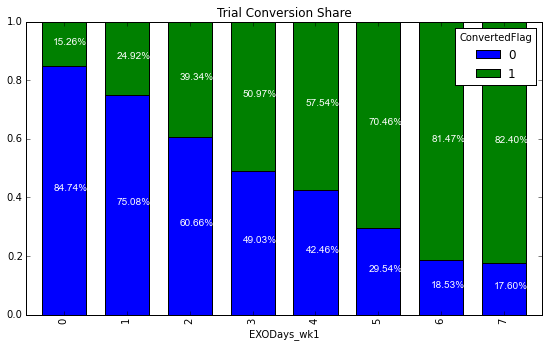

In [11]:
#dfx = newTenants_KeyTrials_PostWk1Conv
#plotConversionRate(dfx, 'EXODays_wk1')
xVar = 'EXODays_wk1'
plotStackedBar(newTenants_KeyTrials_PostWk1Conv, xVar, 'ConvertedFlag')

		   ConvertedFlag
+-------------+---------+--------+---------+--------+
| SPODays_wk1 |   False |   True |   Total |   Rate |
+-------------+---------+--------+---------+--------+
| 0           | 123,028 | 24,464 | 147,492 | 16.59% |
| 1           |  15,966 |  5,097 |  21,063 | 24.20% |
| 2           |   5,955 |  2,233 |   8,188 | 27.27% |
| 3           |   2,992 |  1,394 |   4,386 | 31.78% |
| 4           |   1,790 |    902 |   2,692 | 33.51% |
| 5           |     833 |    597 |   1,430 | 41.75% |
| 6           |     326 |    419 |     745 | 56.24% |
| 7           |      76 |     93 |     169 | 55.03% |
+-------------+---------+--------+---------+--------+


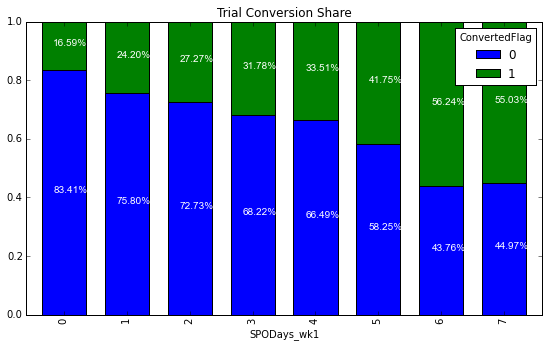

In [13]:
dfx = newTenants_KeyTrials_PostWk1Conv
#plotConversionRate(dfx, 'SPODays_wk1')
xVar = 'SPODays_wk1'
plotStackedBar(newTenants_KeyTrials_PostWk1Conv, xVar, 'ConvertedFlag')

		   ConvertedFlag
+-------------+-----------+----------+-----------+--------+
| LYODays_wk1 |     False |     True |     Total |   Rate |
+-------------+-----------+----------+-----------+--------+
| 0           | 148,062.0 | 33,718.0 | 181,780.0 | 18.55% |
| 1           |   1,651.0 |    706.0 |   2,357.0 | 29.95% |
| 2           |     568.0 |    303.0 |     871.0 | 34.79% |
| 3           |     224.0 |    135.0 |     359.0 | 37.60% |
| 4           |     102.0 |     61.0 |     163.0 | 37.42% |
| 5           |      45.0 |     22.0 |      67.0 | 32.84% |
| 6           |      17.0 |     13.0 |      30.0 | 43.33% |
| 7           |       4.0 |      nan |       nan |   nan% |
+-------------+-----------+----------+-----------+--------+


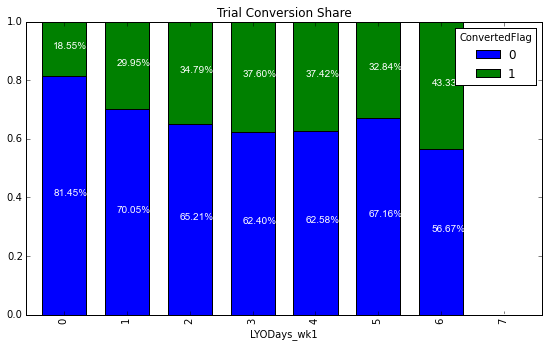

In [14]:
dfx = newTenants_KeyTrials_PostWk1Conv
#plotConversionRate(dfx, 'LYODays_wk1')
xVar = 'LYODays_wk1'
plotStackedBar(newTenants_KeyTrials_PostWk1Conv, xVar, 'ConvertedFlag')

In [15]:
dfx = newTenants_KeyTrials_PostWk1Conv
#plotConversionRate(dfx, 'Pc_Deployed_Users_wk1')
xVar = 'Pc_Deployed_Users_wk1'
plotStackedBar(newTenants_KeyTrials_PostWk1Conv, xVar, 'ConvertedFlag')


KeyError: 26L

#### Conversion by Offer Id

		   ConvertedFlag
+--------------------------------------+----------+----------+----------+--------+
| TrialOfferId                         |    False |     True |    Total |   Rate |
+--------------------------------------+----------+----------+----------+--------+
| 2AA650CE-9CA6-4F63-9299-F2C992FFB0F1 |    282.0 |     80.0 |    362.0 | 22.10% |
| 467EAB54-127B-42D3-B046-3844B860BEBF | 52,471.0 | 18,497.0 | 70,968.0 | 26.06% |
| 4E13298C-9655-496F-AAC7-CF8EDA176F88 |    503.0 |     74.0 |    577.0 | 12.82% |
| 5B7C40FF-DB28-4CD6-B21A-84AB9F3B5CA4 |     83.0 |      1.0 |     84.0 |  1.19% |
| 8368AC6A-5797-4859-B2EC-4D32330277C9 | 43,701.0 |  9,301.0 | 53,002.0 | 17.55% |
| A4DA6EB4-AB6F-4D4E-80A3-207003553A4F |  1,046.0 |    533.0 |  1,579.0 | 33.76% |
| B07A1127-DE83-4A6D-9F85-2C104BDAE8B4 | 56,148.0 |  8,068.0 | 64,216.0 | 12.56% |
| D7B75257-223C-49FC-932E-F2E5FA4A57B2 |      6.0 |      4.0 |     10.0 | 40.00% |
| OLS-BPO-000240                       |      5.0 |      nan |      

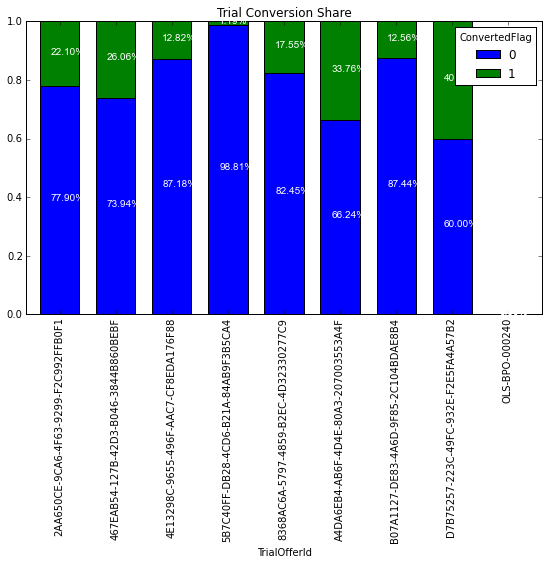

In [16]:
dfx = newTenants_KeyTrials_PostWk1Conv
#plotConversionRate(dfx, 'TrialOfferId')
xVar = 'TrialOfferId'
plotStackedBar(newTenants_KeyTrials_PostWk1Conv, xVar, 'ConvertedFlag')

In [17]:
#plotConversionRate(dfx, 'SRCount_wk1')
xVar = 'SRCount_wk1'
plotStackedBar(newTenants_KeyTrials_PostWk1Conv, xVar, 'ConvertedFlag')

KeyError: 13L

#### Create Categorical Variables for modelling

In [12]:
df = newTenants_KeyTrials_PostWk1Conv

def labelRows(row, originCol):
    if row[originCol] == 1:
        return True
    else :
        return False

def labelRowsNumbersToFlags(row, originCol, threshold):
    if (row[originCol] <= threshold):
        return False
    else :
        return True
    
#Create a Converted Flag binary column
optCol = 'Converted_TF'
df[optCol] = df.apply (lambda row: labelRows (row, 'ConvertedFlag'),axis=1)

#Create a binary flag for EXO usage
optCol = 'EXO_TF'
df[optCol] = df.apply (lambda row: labelRowsNumbersToFlags (row, 'EXODays_wk1', 0),axis=1)

#Create a binary flag for SPO usage
optCol = 'SPO_TF'
df[optCol] = df.apply (lambda row: labelRowsNumbersToFlags (row, 'SPODays_wk1', 0),axis=1)

#Create a binary flag for LYO usage
optCol = 'LYO_TF'
df[optCol] = df.apply (lambda row: labelRowsNumbersToFlags (row, 'LYODays_wk1', 0),axis=1)

#Create a binary flag for Yammer usage
optCol = 'Yammer_TF'
df[optCol] = df.apply (lambda row: labelRowsNumbersToFlags (row, 'YammerDays_wk1', 0),axis=1)


#Create a binary flag for PC Deployed usage
optCol = 'PCDeployed_TF'
df[optCol] = df.apply (lambda row: labelRowsNumbersToFlags (row, 'Pc_Deployed_Users_wk1',0),axis=1)

#Create a binary flag for PC Deployed usage
optCol = 'PCDeployed_TF_2'
df[optCol] = df.apply (lambda row: labelRowsNumbersToFlags (row, 'Pc_Deployed_Users_wk1',1),axis=1)

#Create a binary flag for Mac Deployed usage
optCol = 'MacDeployed_TF'
df[optCol] = df.apply (lambda row: labelRowsNumbersToFlags (row, 'Mac_Deployed_Users_wk1',0),axis=1)

#Create a binary flag for Mac Deployed usage
optCol = 'SRCount_wk1_TF'
df[optCol] = df.apply (lambda row: labelRowsNumbersToFlags (row, 'SRCount_wk1',0),axis=1)

#Create a binary flag for Mac Deployed usage
optCol = 'SRCount_wk1_TF_2'
df[optCol] = df.apply (lambda row: labelRowsNumbersToFlags (row, 'SRCount_wk1',1),axis=1)






		   EXO_TF
+----------------+---------+--------+---------+--------+
| ValidDomainAdd |   False |   True |   Total |   Rate |
+----------------+---------+--------+---------+--------+
| 0              | 143,819 | 19,195 | 163,014 | 11.78% |
| 1              |  14,568 |  8,587 |  23,155 | 37.08% |
+----------------+---------+--------+---------+--------+


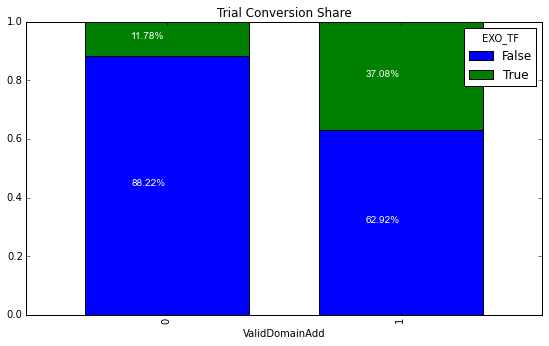

In [13]:
xVar = 'EXO_TF'
#'ValidDomainAdd'

plotStackedBar(newTenants_KeyTrials_PostWk1Conv, 'ValidDomainAdd', xVar)

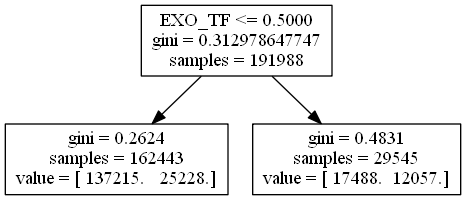

In [14]:
clf = tree.DecisionTreeClassifier()
converted = df[['Converted_TF']]

#####################################
cols = ['EXO_TF']
dt = clf.fit(df[cols], converted)
label = ['EXO_TF']
outFileName = 'EXO_TF' + '.png'
getTreePicture(dt, cols, outFileName)
Image(filename=outFileName)


In [23]:
dt.feature_importances_

array([ 1.])

In [15]:
getLegibleCode(dt, cols)

if ( EXO_TF <= 0.5 ) { 
   Conv Prob 15.53% of 162,443.0
    	0s: 137,215.0  1s:  25,228.0 
} else if (EXO_TF > 0.5) { 
   Conv Prob 40.81% of 29,545.0
    	0s: 17,488.0  1s:  12,057.0 
} 


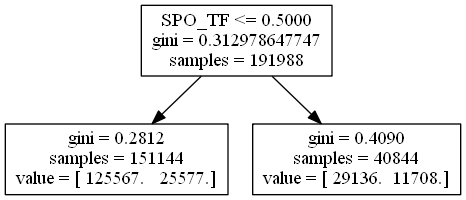

In [16]:

#####################################
cols = ['SPO_TF']
dt = clf.fit(df[cols], converted)
label = ['SPO_TF']
outFileName = 'SPO_TF' + '.png'
getTreePicture(dt, cols, outFileName)
Image(filename=outFileName)
#getLegibleCode(dt, cols)

In [17]:
getLegibleCode(dt, cols)

if ( SPO_TF <= 0.5 ) { 
   Conv Prob 16.92% of 151,144.0
    	0s: 125,567.0  1s:  25,577.0 
} else if (SPO_TF > 0.5) { 
   Conv Prob 28.67% of 40,844.0
    	0s: 29,136.0  1s:  11,708.0 
} 


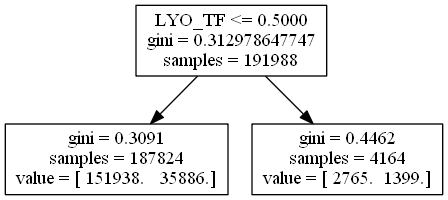

In [28]:
#####################################
cols = ['LYO_TF']
dt = clf.fit(df[cols], converted)
label = ['LYO_TF']
outFileName = 'LYO_TF' + '.png'
getTreePicture(dt, cols, outFileName)
Image(filename=outFileName)


In [29]:
getLegibleCode(dt, cols)

if ( LYO_TF <= 0.5 ) { 
   Conv Prob 19.11% of 187,824.0
    	0s: 151,938.0  1s:  35,886.0 
} else if (LYO_TF > 0.5) { 
   Conv Prob 33.60% of 4,164.0
    	0s: 2,765.0  1s:  1,399.0 
} 


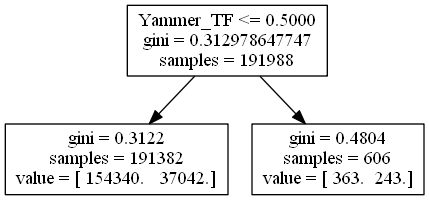

In [30]:
#####################################
cols = ['Yammer_TF']
dt = clf.fit(df[cols], converted)
label = ['Yammer_TF']
outFileName = 'Yammer_TF' + '.png'
getTreePicture(dt, cols, outFileName)
Image(filename=outFileName)


In [31]:
getLegibleCode(dt, cols)

if ( Yammer_TF <= 0.5 ) { 
   Conv Prob 19.36% of 191,382.0
    	0s: 154,340.0  1s:  37,042.0 
} else if (Yammer_TF > 0.5) { 
   Conv Prob 40.10% of 606.0
    	0s: 363.0  1s:  243.0 
} 


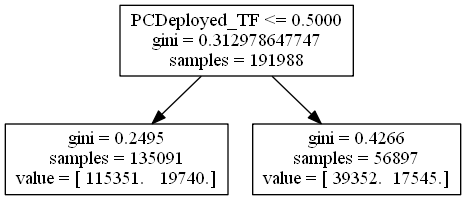

In [32]:
#####################################
cols = ['PCDeployed_TF']
dt = clf.fit(df[cols], converted)
label = ['PCDeployed_TF']
outFileName = 'PCDeployed_TF' + '.png'
getTreePicture(dt, cols, outFileName)
Image(filename=outFileName)


In [33]:
getLegibleCode(dt, cols)

if ( PCDeployed_TF <= 0.5 ) { 
   Conv Prob 14.61% of 135,091.0
    	0s: 115,351.0  1s:  19,740.0 
} else if (PCDeployed_TF > 0.5) { 
   Conv Prob 30.84% of 56,897.0
    	0s: 39,352.0  1s:  17,545.0 
} 


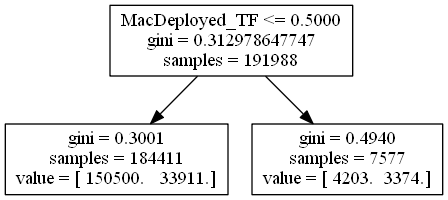

In [34]:
#####################################
cols = ['MacDeployed_TF']
dt = clf.fit(df[cols], converted)
label = ['MacDeployed_TF']
outFileName = 'MacDeployed_TF' + '.png'
getTreePicture(dt, cols, outFileName)
Image(filename=outFileName)


In [35]:
getLegibleCode(dt, cols)

if ( MacDeployed_TF <= 0.5 ) { 
   Conv Prob 18.39% of 184,411.0
    	0s: 150,500.0  1s:  33,911.0 
} else if (MacDeployed_TF > 0.5) { 
   Conv Prob 44.53% of 7,577.0
    	0s: 4,203.0  1s:  3,374.0 
} 


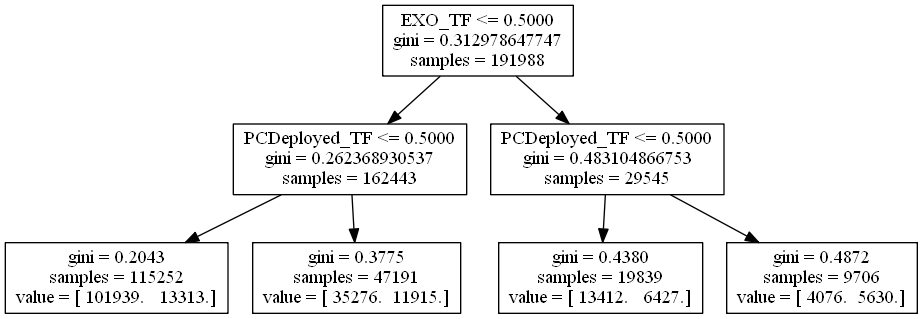

In [36]:
#clf = tree.DecisionTreeClassifier()
#converted = df[['Converted_TF']]

#####################################
cols = ['PCDeployed_TF' , 'EXO_TF' ]
dt = clf.fit(df[cols], converted)
label = ['PCDeployed_TF' , 'EXO_TF']
outFileName = 'EXO_PC' + '.png'
getTreePicture(dt, cols, outFileName)
Image(filename=outFileName)


In [37]:
printImportance(cols,dt)

+---------------+------------+
| Variable      | Importance |
+---------------+------------+
| PCDeployed_TF |     0.3979 |
| EXO_TF        |     0.6021 |
+---------------+------------+




In [38]:
getLegibleCode(dt, cols)

if ( EXO_TF <= 0.5 ) { 
   if ( PCDeployed_TF <= 0.5 ) { 
      Conv Prob 11.55% of 115,252.0
       	0s: 101,939.0  1s:  13,313.0 
   } else if (PCDeployed_TF > 0.5) { 
      Conv Prob 25.25% of 47,191.0
       	0s: 35,276.0  1s:  11,915.0 
   } 
} else if (EXO_TF > 0.5) { 
   if ( PCDeployed_TF <= 0.5 ) { 
      Conv Prob 32.40% of 19,839.0
       	0s: 13,412.0  1s:  6,427.0 
   } else if (PCDeployed_TF > 0.5) { 
      Conv Prob 58.01% of 9,706.0
       	0s: 4,076.0  1s:  5,630.0 
   } 
} 


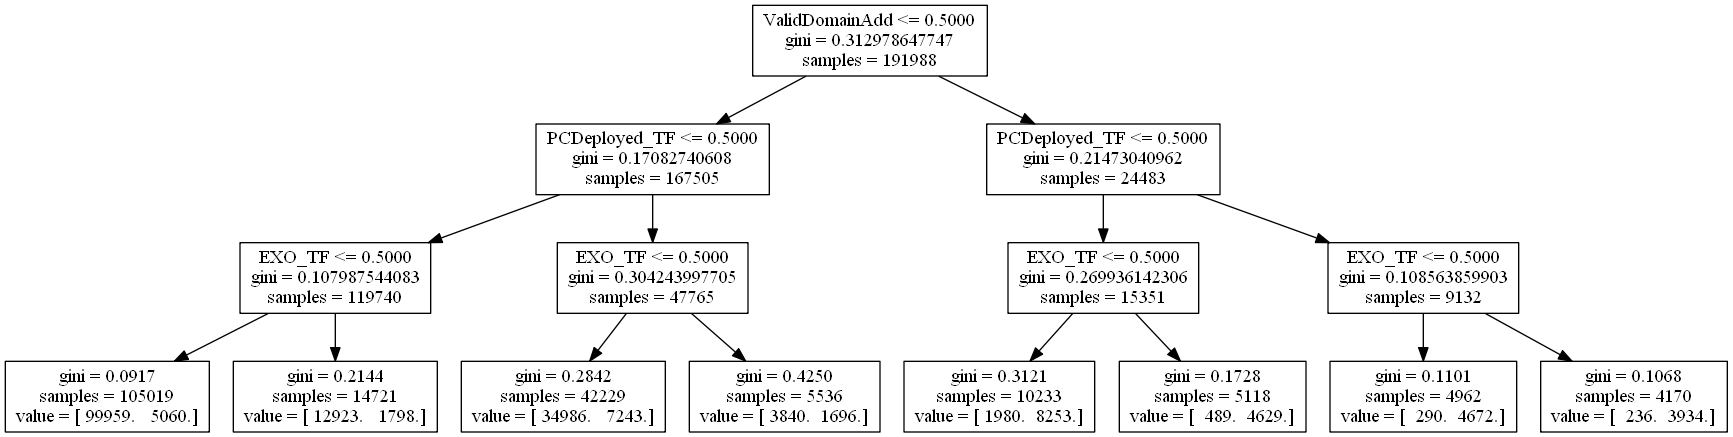

In [39]:
cols = ['PCDeployed_TF' , 'EXO_TF' ,'ValidDomainAdd']
dt = clf.fit(df[cols], converted)
label = ['PCDeployed_TF' , 'EXO_TF', 'ValidDomainAdd']
outFileName = 'EXO_PC_' + '.png'
getTreePicture(dt, cols, outFileName)
Image(filename=outFileName)




In [40]:
printImportance(cols, dt)

+----------------+------------+
| Variable       | Importance |
+----------------+------------+
| PCDeployed_TF  |     0.0457 |
| EXO_TF         |     0.0138 |
| ValidDomainAdd |     0.9405 |
+----------------+------------+




In [41]:
getLegibleCode(dt, cols)

if ( ValidDomainAdd <= 0.5 ) { 
   if ( PCDeployed_TF <= 0.5 ) { 
      if ( EXO_TF <= 0.5 ) { 
         Conv Prob 4.82% of 105,019.0
          	0s: 99,959.0  1s:  5,060.0 
      } else if (EXO_TF > 0.5) { 
         Conv Prob 12.21% of 14,721.0
          	0s: 12,923.0  1s:  1,798.0 
      } 
   } else if (PCDeployed_TF > 0.5) { 
      if ( EXO_TF <= 0.5 ) { 
         Conv Prob 17.15% of 42,229.0
          	0s: 34,986.0  1s:  7,243.0 
      } else if (EXO_TF > 0.5) { 
         Conv Prob 30.64% of 5,536.0
          	0s: 3,840.0  1s:  1,696.0 
      } 
   } 
} else if (ValidDomainAdd > 0.5) { 
   if ( PCDeployed_TF <= 0.5 ) { 
      if ( EXO_TF <= 0.5 ) { 
         Conv Prob 80.65% of 10,233.0
          	0s: 1,980.0  1s:  8,253.0 
      } else if (EXO_TF > 0.5) { 
         Conv Prob 90.45% of 5,118.0
          	0s: 489.0  1s:  4,629.0 
      } 
   } else if (PCDeployed_TF > 0.5) { 
      if ( EXO_TF <= 0.5 ) { 
         Conv Prob 94.16% of 4,962.0
          	0s: 290.0  1s:  4,672.0 
     

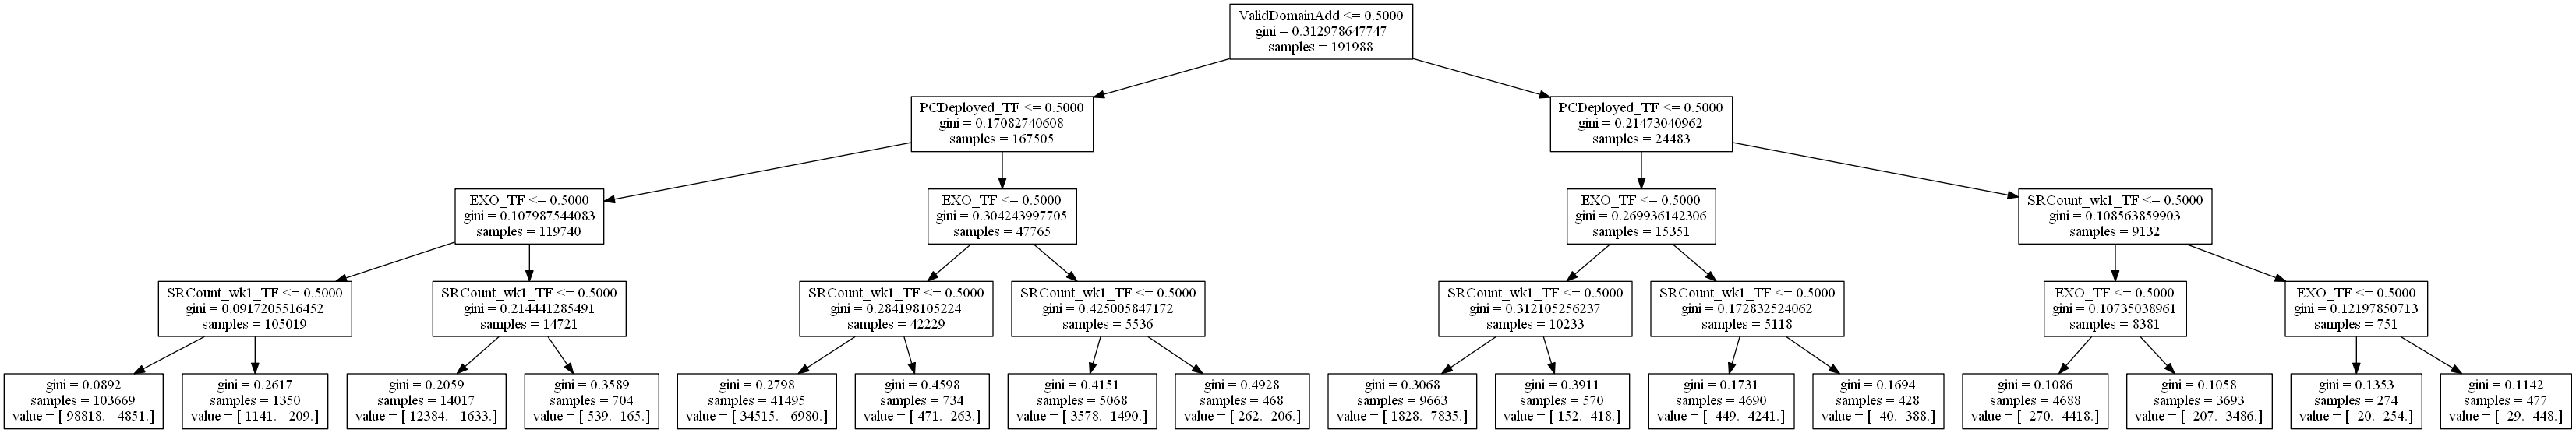

In [42]:
cols = ['PCDeployed_TF' , 'EXO_TF' ,'ValidDomainAdd','SRCount_wk1_TF']
dt = clf.fit(df[cols], converted)
label = ['PCDeployed_TF' , 'EXO_TF', 'ValidDomainAdd','SRCount_wk1_TF']
outFileName = 'EXO_PC_Domain_SR' + '.png'
getTreePicture(dt, cols, outFileName)
Image(filename=outFileName)




In [43]:
printImportance(cols, dt)

+----------------+------------+
| Variable       | Importance |
+----------------+------------+
| PCDeployed_TF  |     0.0455 |
| EXO_TF         |     0.0137 |
| ValidDomainAdd |     0.9362 |
| SRCount_wk1_TF |     0.0045 |
+----------------+------------+




In [44]:
getLegibleCode(dt, cols)

if ( ValidDomainAdd <= 0.5 ) { 
   if ( PCDeployed_TF <= 0.5 ) { 
      if ( EXO_TF <= 0.5 ) { 
         if ( SRCount_wk1_TF <= 0.5 ) { 
            Conv Prob 4.68% of 103,669.0
             	0s: 98,818.0  1s:  4,851.0 
         } else if (SRCount_wk1_TF > 0.5) { 
            Conv Prob 15.48% of 1,350.0
             	0s: 1,141.0  1s:  209.0 
         } 
      } else if (EXO_TF > 0.5) { 
         if ( SRCount_wk1_TF <= 0.5 ) { 
            Conv Prob 11.65% of 14,017.0
             	0s: 12,384.0  1s:  1,633.0 
         } else if (SRCount_wk1_TF > 0.5) { 
            Conv Prob 23.44% of 704.0
             	0s: 539.0  1s:  165.0 
         } 
      } 
   } else if (PCDeployed_TF > 0.5) { 
      if ( EXO_TF <= 0.5 ) { 
         if ( SRCount_wk1_TF <= 0.5 ) { 
            Conv Prob 16.82% of 41,495.0
             	0s: 34,515.0  1s:  6,980.0 
         } else if (SRCount_wk1_TF > 0.5) { 
            Conv Prob 35.83% of 734.0
             	0s: 471.0  1s:  263.0 
         } 
      } else if (EXO_

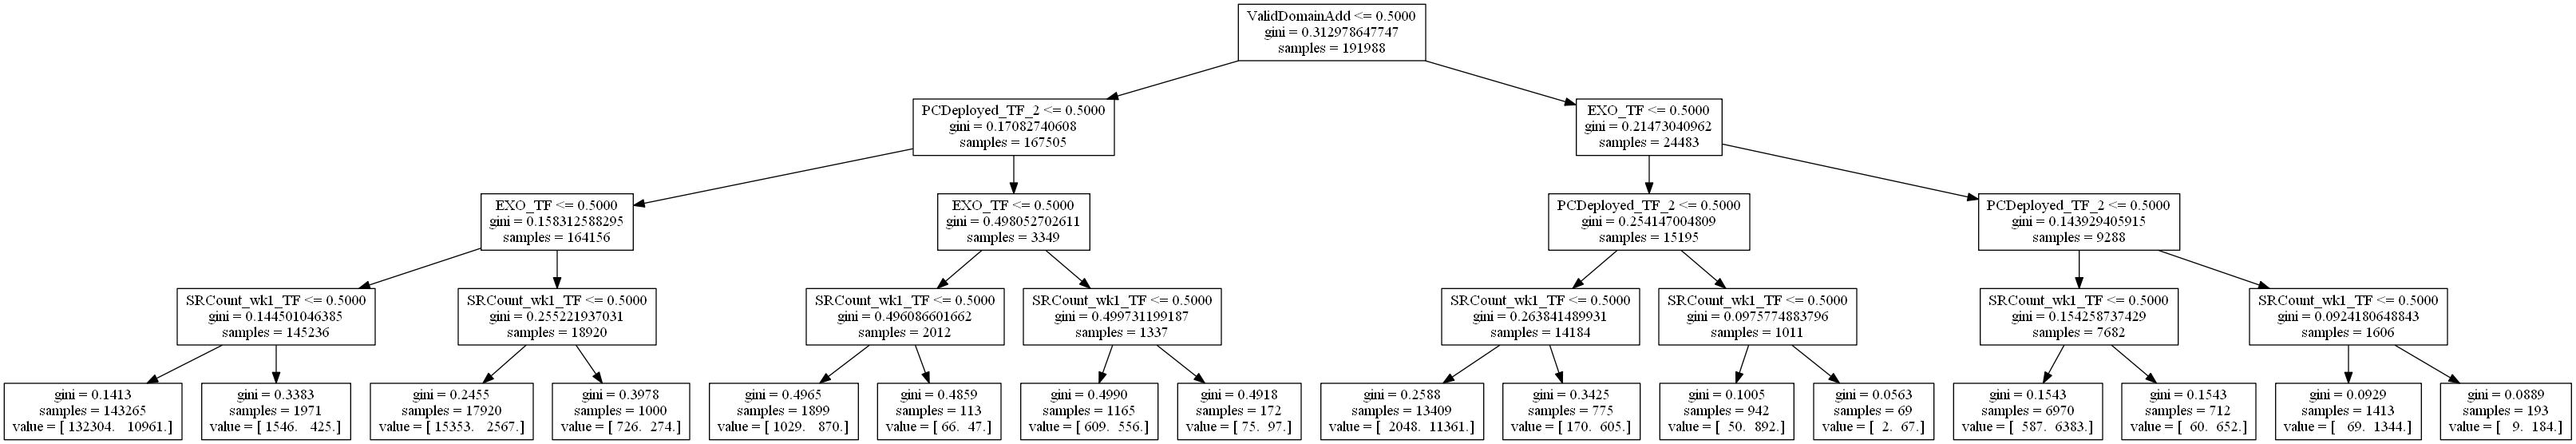

In [45]:
cols = ['PCDeployed_TF_2' , 'EXO_TF' ,'ValidDomainAdd','SRCount_wk1_TF']
dt = clf.fit(df[cols], converted)
label = ['PCDeployed_TF_2' , 'EXO_TF', 'ValidDomainAdd','SRCount_wk1_TF']
outFileName = 'EXO_PC2_Domain_SR2' + '.png'
getTreePicture(dt, cols, outFileName)
Image(filename=outFileName)




In [46]:
printImportance(cols, dt)

+-----------------+------------+
| Variable        | Importance |
+-----------------+------------+
| PCDeployed_TF_2 |     0.0357 |
| EXO_TF          |     0.0084 |
| ValidDomainAdd  |     0.9516 |
| SRCount_wk1_TF  |     0.0042 |
+-----------------+------------+




In [47]:
getLegibleCode(dt, cols)

if ( ValidDomainAdd <= 0.5 ) { 
   if ( PCDeployed_TF_2 <= 0.5 ) { 
      if ( EXO_TF <= 0.5 ) { 
         if ( SRCount_wk1_TF <= 0.5 ) { 
            Conv Prob 7.65% of 143,265.0
             	0s: 132,304.0  1s:  10,961.0 
         } else if (SRCount_wk1_TF > 0.5) { 
            Conv Prob 21.56% of 1,971.0
             	0s: 1,546.0  1s:  425.0 
         } 
      } else if (EXO_TF > 0.5) { 
         if ( SRCount_wk1_TF <= 0.5 ) { 
            Conv Prob 14.32% of 17,920.0
             	0s: 15,353.0  1s:  2,567.0 
         } else if (SRCount_wk1_TF > 0.5) { 
            Conv Prob 27.40% of 1,000.0
             	0s: 726.0  1s:  274.0 
         } 
      } 
   } else if (PCDeployed_TF_2 > 0.5) { 
      if ( EXO_TF <= 0.5 ) { 
         if ( SRCount_wk1_TF <= 0.5 ) { 
            Conv Prob 45.81% of 1,899.0
             	0s: 1,029.0  1s:  870.0 
         } else if (SRCount_wk1_TF > 0.5) { 
            Conv Prob 41.59% of 113.0
             	0s: 66.0  1s:  47.0 
         } 
      } else if (EX

In [48]:
def printImportanceLocal(cols, dt):
    t = PrettyTable(['Variable','Importance'])
    t.align['Variable'] = "l"
    t.align['Importance'] = "r"
    for i in range(len(cols)):
        t.add_row([cols[i], "{:.4f}".format(dt.feature_importances_[i])])
    print t
    print '\n'
#from prettytable import PrettyTable

#from DecisionTreeHelpers.cdt import printImportance
printImportance(cols, dt)

+-----------------+------------+
| Variable        | Importance |
+-----------------+------------+
| PCDeployed_TF_2 |     0.0357 |
| EXO_TF          |     0.0084 |
| ValidDomainAdd  |     0.9516 |
| SRCount_wk1_TF  |     0.0042 |
+-----------------+------------+




In [49]:
#df.to_csv("ModellingDataset_i11_OUT.csv", sep=',')

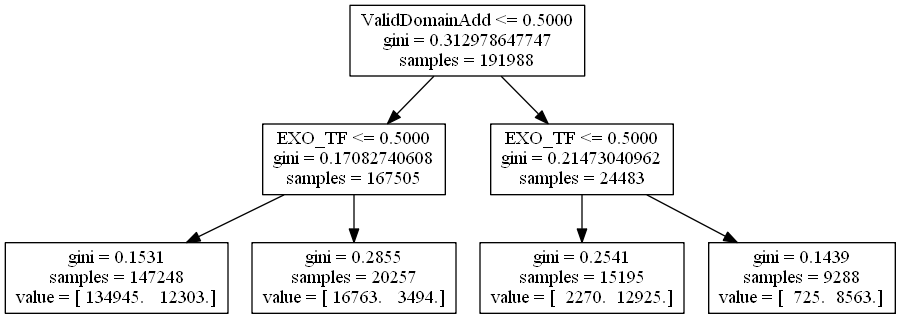

In [50]:
#clf = tree.DecisionTreeClassifier()
#converted = df[['Converted_TF']]

#####################################
cols = ['ValidDomainAdd' , 'EXO_TF' ]
dt = clf.fit(df[cols], converted)
label = ['ValidDomainAdd' , 'EXO_TF']
outFileName = 'EXO_DomainAdd' + '.png'
getTreePicture(dt, cols, outFileName)
Image(filename=outFileName)


In [51]:
printImportance(cols, dt)

+----------------+------------+
| Variable       | Importance |
+----------------+------------+
| ValidDomainAdd |     0.9872 |
| EXO_TF         |     0.0128 |
+----------------+------------+




In [52]:
getLegibleCode(dt, cols)

if ( ValidDomainAdd <= 0.5 ) { 
   if ( EXO_TF <= 0.5 ) { 
      Conv Prob 8.36% of 147,248.0
       	0s: 134,945.0  1s:  12,303.0 
   } else if (EXO_TF > 0.5) { 
      Conv Prob 17.25% of 20,257.0
       	0s: 16,763.0  1s:  3,494.0 
   } 
} else if (ValidDomainAdd > 0.5) { 
   if ( EXO_TF <= 0.5 ) { 
      Conv Prob 85.06% of 15,195.0
       	0s: 2,270.0  1s:  12,925.0 
   } else if (EXO_TF > 0.5) { 
      Conv Prob 92.19% of 9,288.0
       	0s: 725.0  1s:  8,563.0 
   } 
} 


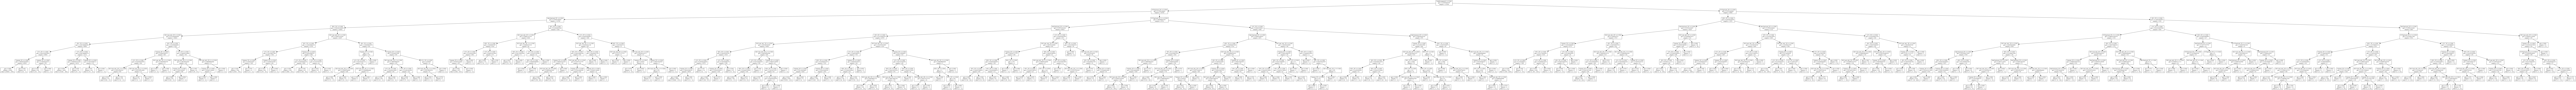

In [53]:
#Kitchen Sink
#'EXO_TF','SPO_TF','LYO_TF','Yammer_TF','PCDeployed_TF','PCDeployed_TF_2','MacDeployed_TF','SRCount_wk1_TF','SRCount_wk1_TF_2'
#df = SBTriallers
cols = ['ValidDomainAdd','EXO_TF','SPO_TF','LYO_TF','Yammer_TF','PCDeployed_TF','PCDeployed_TF_2','MacDeployed_TF','SRCount_wk1_TF','SRCount_wk1_TF_2']
dt = clf.fit(df[cols], converted)
label = ['ValidDomainAdd','EXO_TF','SPO_TF','LYO_TF','Yammer_TF','PCDeployed_TF','PCDeployed_TF_2','MacDeployed_TF','SRCount_wk1_TF','SRCount_wk1_TF_2']
outFileName = 'SB_Kitchen_Sink' + '.png'
getTreePicture(dt, cols, outFileName)
Image(filename=outFileName)

In [54]:
printImportance(cols, dt)

+------------------+------------+
| Variable         | Importance |
+------------------+------------+
| ValidDomainAdd   |     0.8894 |
| EXO_TF           |     0.0086 |
| SPO_TF           |     0.0058 |
| LYO_TF           |     0.0015 |
| Yammer_TF        |     0.0008 |
| PCDeployed_TF    |     0.0432 |
| PCDeployed_TF_2  |     0.0195 |
| MacDeployed_TF   |     0.0269 |
| SRCount_wk1_TF   |     0.0037 |
| SRCount_wk1_TF_2 |     0.0007 |
+------------------+------------+




In [58]:
from sklearn.ensemble import RandomForestClassifier

features = df[cols]

clf = RandomForestClassifier(n_jobs=2)
#y, _ = pd.factorize(train['species'])
#clf.fit(df[cols], converted)
print df[cols]
#preds = iris.target_names[clf.predict(test[features])]
#pd.crosstab(test['species'], preds, rownames=['actual'], colnames=['preds'])

        ValidDomainAdd EXO_TF SPO_TF LYO_TF Yammer_TF PCDeployed_TF  \
0                    0   True  False  False     False         False   
2                    0  False  False  False     False         False   
3                    0  False  False  False     False         False   
4                    0  False  False  False     False         False   
5                    0  False  False  False     False         False   
11                   0  False  False  False     False          True   
14                   0  False  False  False     False         False   
15                   0  False  False  False     False          True   
18                   0  False  False  False     False         False   
20                   0  False  False  False     False         False   
23                   0  False  False  False     False         False   
26                   0  False  False  False     False         False   
29                   1   True   True  False     False          True   
34    